In [1]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep 
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel('Alenma.xlsx')

In [3]:
# data.info()
data.head()

,Date,OPEN,HIGH,LOW,CLOSE,CHANGE,CHANGE%,VOLUME_TRADED,VLUE_TRADED(SAR),NUMBER_OF_DEALS
0,2020-04-05,21.98,22.82,21.60,22.50,1.14,5.34,28053476,6.227238e+08,12527
1,2020-04-02,20.94,21.36,20.92,21.36,0.62,2.99,19223274,4.054137e+08,8200
2,2020-04-01,20.72,20.86,20.60,20.74,-0.06,-0.29,11247335,2.333635e+08,5206
3,2020-03-31,20.08,20.84,20.08,20.80,0.84,4.21,18667739,3.821555e+08,7917
4,2020-03-30,19.96,20.16,19.86,19.96,0.02,0.10,9912599,1.982566e+08,5849


In [4]:
data= data.sort_values(['Date'], axis=0, ascending=True, inplace=False)
data.head()

,Date,OPEN,HIGH,LOW,CLOSE,CHANGE,CHANGE%,VOLUME_TRADED,VLUE_TRADED(SAR),NUMBER_OF_DEALS
2953,2008-06-03,15.75,18.00,14.25,16.00,0.00,0.00,598084926,9.098327e+09,757118
2952,2008-06-04,16.75,17.50,16.50,17.50,1.50,9.37,176058432,3.012619e+09,172038
2951,2008-06-07,18.75,19.25,18.25,19.25,1.75,10.00,66897792,1.273346e+09,90783
2950,2008-06-08,20.50,21.00,18.75,19.00,-0.25,-1.29,338317953,6.706081e+09,200558
2949,2008-06-09,19.00,19.50,18.50,18.75,-0.25,-1.31,123988386,2.342107e+09,77563


In [5]:
# data.isnull().sum()

In [6]:
# data.dtypes
# data.describe()
# data['LOW'].value_counts()

In [7]:
data['Date'] =pd.to_datetime(data.Date, format='%Y%m%d', errors='coerce')

In [8]:
data.set_index(data.Date, inplace= True)

In [9]:
data.head(2)

,Date,OPEN,HIGH,LOW,CLOSE,CHANGE,CHANGE%,VOLUME_TRADED,VLUE_TRADED(SAR),NUMBER_OF_DEALS
Date,,,,,,,,,,
2008-06-03,2008-06-03,15.75,18.0,14.25,16.0,0.0,0.00,598084926,9.098327e+09,757118
2008-06-04,2008-06-04,16.75,17.5,16.50,17.5,1.5,9.37,176058432,3.012619e+09,172038


In [10]:
data.drop(['Date'], axis=1,inplace=True)

In [11]:
data.head(2)

,OPEN,HIGH,LOW,CLOSE,CHANGE,CHANGE%,VOLUME_TRADED,VLUE_TRADED(SAR),NUMBER_OF_DEALS
Date,,,,,,,,,
2008-06-03,15.75,18.0,14.25,16.0,0.0,0.00,598084926,9.098327e+09,757118
2008-06-04,16.75,17.5,16.50,17.5,1.5,9.37,176058432,3.012619e+09,172038


In [12]:
#Add columns with useful data extracted from the DateTime index
data['Day']= data.index.day
data['Month']= data.index.month
data['Year']= data.index.year

In [13]:
data.head(2)

,OPEN,HIGH,LOW,CLOSE,CHANGE,CHANGE%,VOLUME_TRADED,VLUE_TRADED(SAR),NUMBER_OF_DEALS,Day,Month,Year
Date,,,,,,,,,,,,
2008-06-03,15.75,18.0,14.25,16.0,0.0,0.00,598084926,9.098327e+09,757118,3,6,2008
2008-06-04,16.75,17.5,16.50,17.5,1.5,9.37,176058432,3.012619e+09,172038,4,6,2008


In [14]:
data.tail(2)

,OPEN,HIGH,LOW,CLOSE,CHANGE,CHANGE%,VOLUME_TRADED,VLUE_TRADED(SAR),NUMBER_OF_DEALS,Day,Month,Year
Date,,,,,,,,,,,,
2020-04-02,20.94,21.36,20.92,21.36,0.62,2.99,19223274,4.054137e+08,8200,2,4,2020
2020-04-05,21.98,22.82,21.60,22.50,1.14,5.34,28053476,6.227238e+08,12527,5,4,2020


/Users/shehanaaljaloud/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


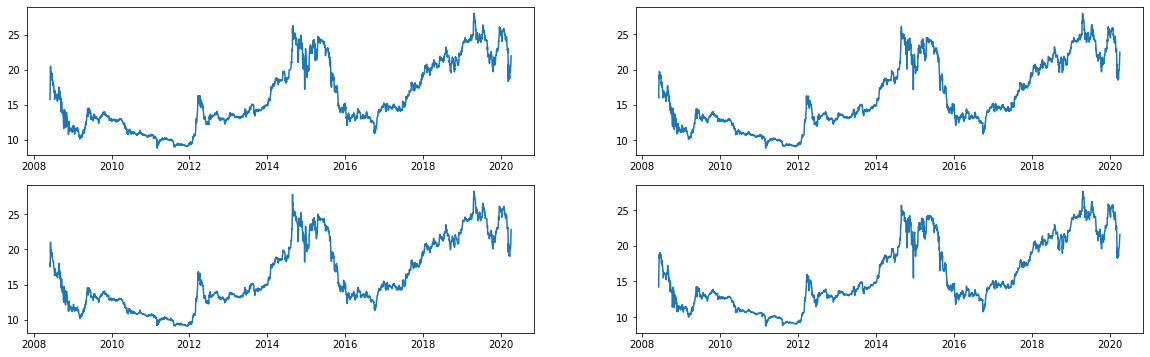

In [15]:
fig,ax= plt.subplots(nrows=2,ncols=2, figsize=(20,6))
ax = ax.ravel()
ax[0].plot(data.OPEN)
ax[1].plot(data.CLOSE)
ax[2].plot(data.HIGH)
ax[3].plot(data.LOW)

In [16]:
march =pd.DataFrame(data.loc[data['Month'] == 3])

march20 =pd.DataFrame(data.loc[data['Year'] == 2020])

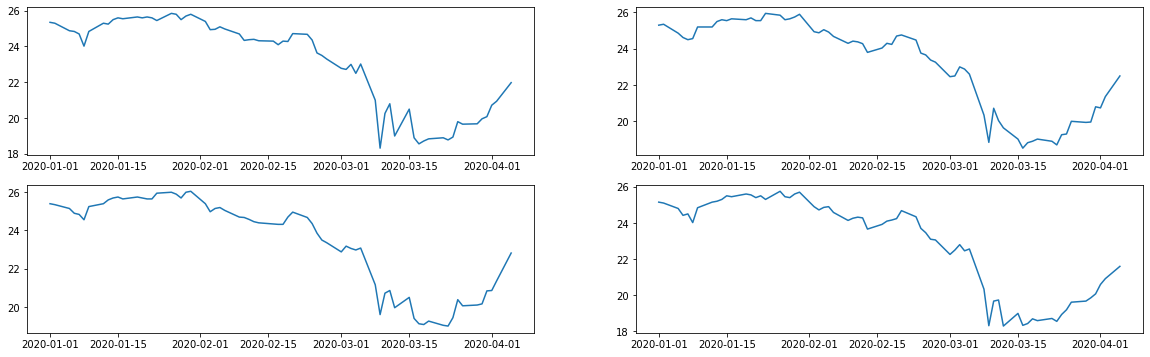

In [17]:
fig,ax= plt.subplots(nrows=2,ncols=2, figsize=(20,6))
ax = ax.ravel()
ax[0].plot(march20.OPEN)
ax[1].plot(march20.CLOSE)
ax[2].plot(march20.HIGH)
ax[3].plot(march20.LOW)

In [18]:
train_data = data['2020-02-01':'2008-06-04']
test_data = data['2020-03-29':'2020-02-02']

In [19]:
train_data.shape
test_data.shape

(0, 12)

In [20]:
A=data[['CLOSE']]
A.head()

,CLOSE
Date,
2008-06-03,16.00
2008-06-04,17.50
2008-06-07,19.25
2008-06-08,19.00
2008-06-09,18.75


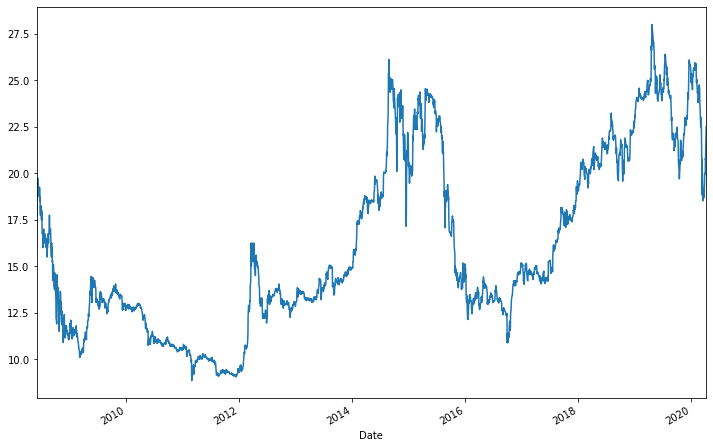

In [21]:
data['CLOSE'].plot(figsize=(12,8))

In [22]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


Using TensorFlow backend.


In [23]:
#Create a new dataframe with only the close column
df = data.filter(['CLOSE'])
dataset = df.values

In [24]:
df.head()
# df.tail()

,CLOSE
Date,
2008-06-03,16.00
2008-06-04,17.50
2008-06-07,19.25
2008-06-08,19.00
2008-06-09,18.75


In [25]:
dataset[:5]

array([[16.  ],
       [17.5 ],
       [19.25],
       [19.  ],
       [18.75]])

In [26]:
training_data_len = math.ceil(len(dataset) * .8)
past_days = 5

In [27]:
# len(y_train)
# len(x_train)

In [28]:
training_data_len

2364

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [30]:
# print(scaled_data[:5])
# print(train_data[:8])

In [31]:
#create the training data set
#created the scaled training set

train_data = scaled_data[0: training_data_len,:]

#split the data into x_train and y_train
#y_train starts from day6 and x_train is five days before y_train

x_train = []
y_train= []

for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i,0]) 
    y_train.append(train_data[i, 0])

In [32]:
# print(x_train[:5], '\n')
# print(y_train[:5])


In [33]:
#convert training datasets to np array instead of list
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [35]:
#build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [37]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2359/2359 [==============================] - 25s 10ms/step - loss: 0.0018


In [194]:
# model.evaluate(x_train, y_train)


2357/2357 [==============================] - 0s 206us/step


0.0013330559010447925

In [38]:
#create the testing dataset

#create a new array

test_data = scaled_data[training_data_len-past_days: , :]

#create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, 0])

In [39]:
#convert  the data to a np array
x_test = np.array(x_test)

#
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
#get the models predicted price values
predictions = model.predict(x_test)

#Undo the scaling
predictions = scaler.inverse_transform(predictions)

In [150]:
y_test.shape

(590, 1)

In [151]:
predictions.shape

(590, 1)

In [152]:
# x_test
# valid.head()

/Users/shehanaaljaloud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


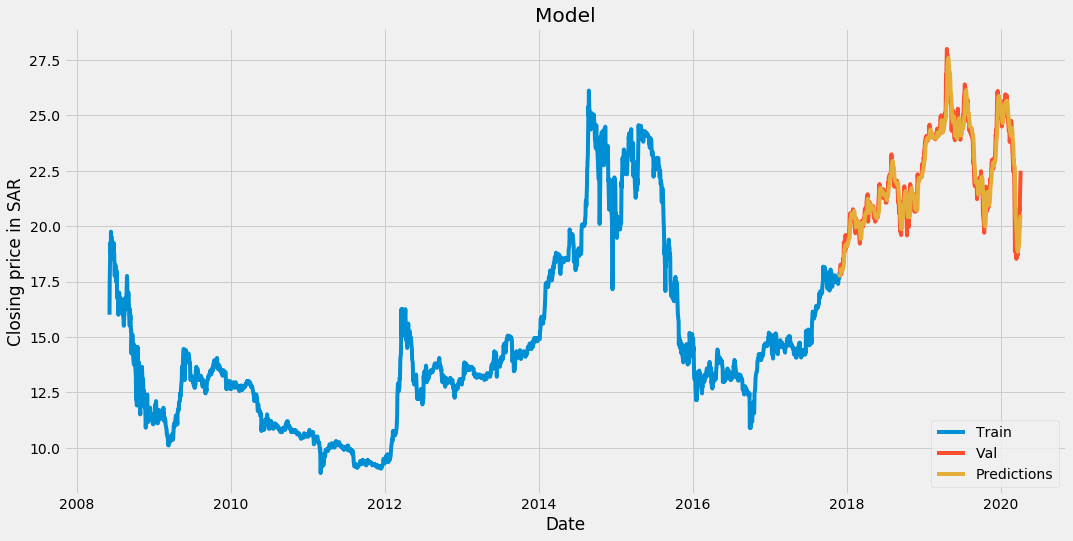

In [41]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title("Model")

plt.xlabel("Date")
plt.ylabel("Closing price in SAR")

plt.plot(train["CLOSE"])
plt.plot(valid[["CLOSE", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

/Users/shehanaaljaloud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


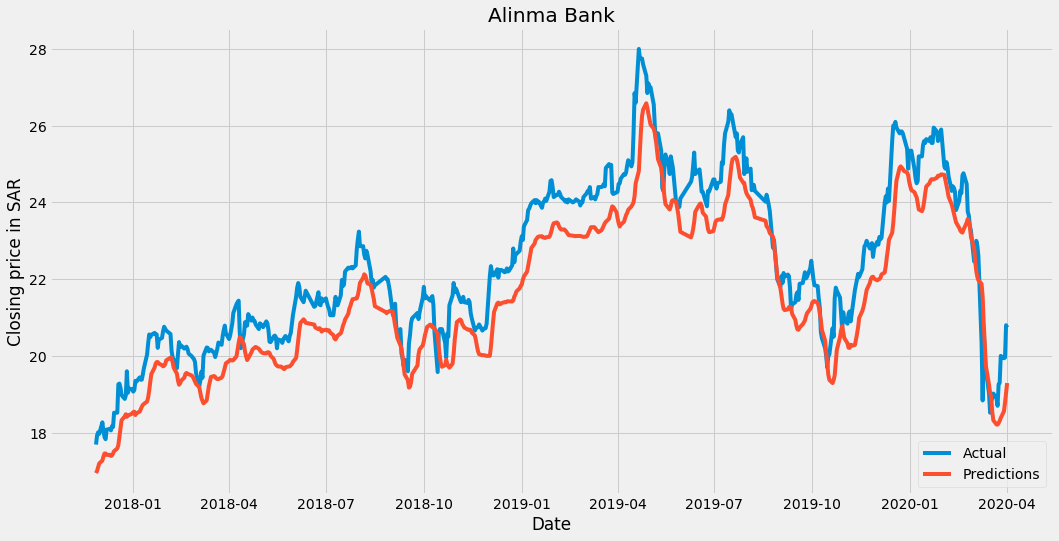

In [154]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title("Alinma Bank")

plt.xlabel("Date")
plt.ylabel("Closing price in SAR")

# plt.plot(train["CLOSE"])
plt.plot(valid[["CLOSE", "Predictions"]])
plt.legend(["Actual", "Predictions"], loc="lower right")
plt.show()

In [50]:
apple_quote = pd.read_excel('Alenma.xlsx')
apple_quote= apple_quote.sort_values(['Date'], axis=0, ascending=True, inplace=False)
# last_row = len(apple_quote)-1
# apple_quote = apple_quote.drop(apple_quote.index[last_row])

new_df = apple_quote.filter(["CLOSE"])
last_60_days = new_df[-5:].values

#scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

#reshape the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

pred_price[0][0]

20.979446

In [45]:
apple_quote2 =pd.read_excel('Alenma.xlsx')
apple_quote2=apple_quote2.sort_values(['Date'], axis=0, ascending=True, inplace=False)
apple_quote2 = apple_quote2.tail(1)

In [46]:
print("Actual: " + str(apple_quote2["CLOSE"][0]))
print("Predicted: " + str(pred_price[0][0]))

Actual: 22.5
Predicted: 20.513716


In [52]:
valid[["CLOSE", "Predictions"]].tail(10)

,CLOSE,Predictions
Date,,
2020-03-23,18.70,18.845051
2020-03-24,19.26,18.895899
2020-03-25,19.30,18.950315
2020-03-26,20.00,19.024155
2020-03-29,19.94,19.191463
2020-03-30,19.96,19.419016
2020-03-31,20.80,19.687531
2020-04-01,20.74,19.960251
2020-04-02,21.36,20.255508


In [49]:
apple_quote.tail()

,Date,OPEN,HIGH,LOW,CLOSE,CHANGE,CHANGE%,VOLUME_TRADED,VLUE_TRADED(SAR),NUMBER_OF_DEALS
0,2020-04-05,21.98,22.82,21.6,22.5,1.14,5.34,28053476,6.227238e+08,12527


In [80]:
# tommorow 

apple_quote = pd.read_excel('Alenma.xlsx')
apple_quote= apple_quote.sort_values(['Date'], axis=0, ascending=True, inplace=False)
# last_row = len(apple_quote)-1
# apple_quote = apple_quote.drop(apple_quote.index[last_row])

new_df = apple_quote.filter(["CLOSE"])
last_60_days = new_df[-past_days:].values

#scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

#reshape the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

pred_price[0][0]

20.361341

In [85]:
AlinmaBank_close_prices = valid[["CLOSE", "Predictions"]]

In [87]:
AlinmaBank_close_prices.to_csv('AlinmaBank_close_prices.csv')

In [88]:
AlinmaBank_close_prices

,CLOSE,Predictions
Date,,
2017-11-27,17.69,17.614462
2017-11-28,17.93,17.675066
2017-11-29,18.01,17.774467
2017-11-30,17.97,17.878454
2017-12-03,18.27,17.958258
2017-12-04,18.04,18.071245
2017-12-05,17.89,18.153975
2017-12-06,17.83,18.156507
2017-12-07,18.08,18.119635


# High

In [90]:
#Create a new dataframe with only the close column
df = data.filter(['HIGH'])
dataset = df.values

In [91]:
training_data_len = math.ceil(len(dataset) * .8)
past_days = 5

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#create the training data set
#created the scaled training set

train_data = scaled_data[0: training_data_len,:]

#split the data into x_train and y_train
#y_train starts from day6 and x_train is five days before y_train

x_train = []
y_train= []

for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i,0]) 
    y_train.append(train_data[i, 0])

#convert training datasets to np array instead of list
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(x_train, y_train, batch_size=1, epochs=1)

#create the testing dataset

#create a new array

test_data = scaled_data[training_data_len-past_days: , :]

#create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, 0])
    
#convert  the data to a np array
x_test = np.array(x_test)
#
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the models predicted price values
predictions = model.predict(x_test)

#Undo the scaling
predictions = scaler.inverse_transform(predictions)

Epoch 1/1
2357/2357 [==============================] - 24s 10ms/step - loss: 0.0015


/Users/shehanaaljaloud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


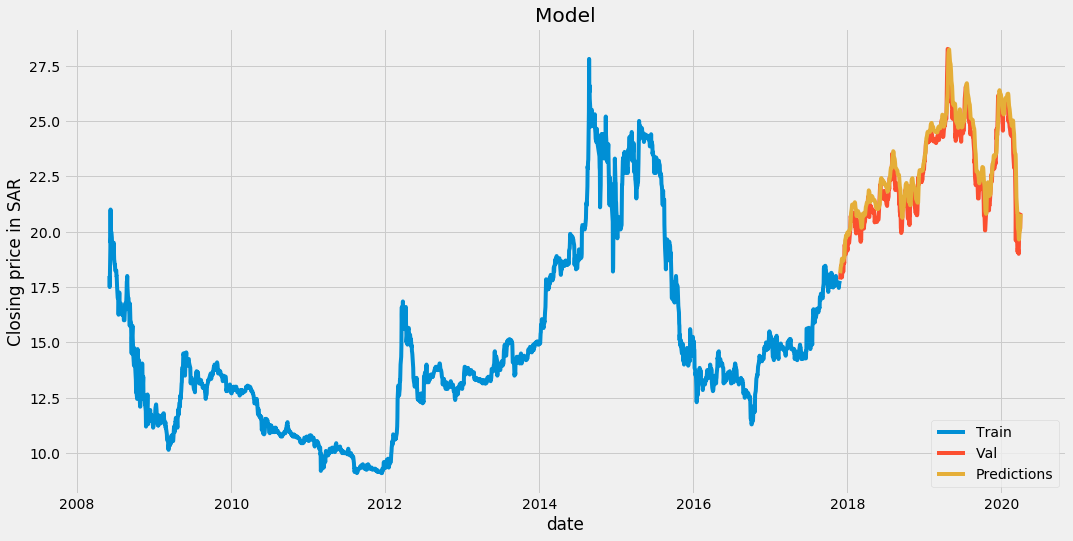

In [92]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title("Model")

plt.xlabel("date")
plt.ylabel("Closing price in SAR")

plt.plot(train["HIGH"])
plt.plot(valid[["HIGH", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

/Users/shehanaaljaloud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


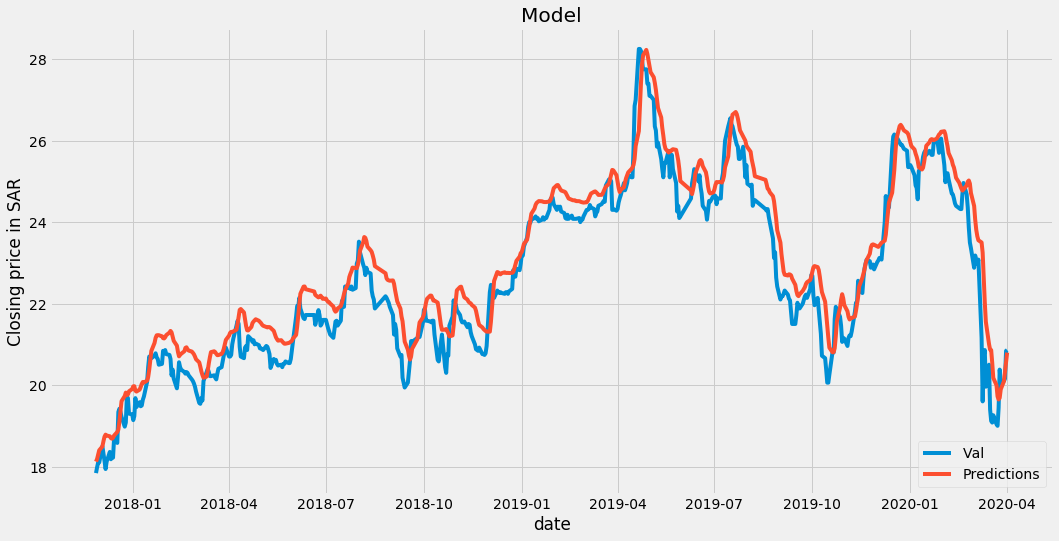

In [110]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

valid["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title("Model")

plt.xlabel("date")
plt.ylabel("Closing price in SAR")

plt.plot(valid[["HIGH", "Predictions"]])
plt.legend(["Val", "Predictions"], loc="lower right")
plt.show()
